C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:67: RuntimeWarning: invalid value encountered in scalar subtract
  call_price = (S0 * Psi(d * sqrt((1-c1)/nu), (a + s) * sqrt(nu/(1 - c1)), T/nu) -
C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:48: RuntimeWarning: invalid value encountered in scalar multiply
  psi_value = (c**(x3+0.5) * exp(sign_x1*c) * (1+u)**x3 / (sqrt(2*pi) * gamma(x3) * x3) *
C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:49: R

Iteration 1: Current parameters: [0.14380822 0.3026976  0.04579228 0.53922858], Convergence: 0.0036354165326256977


C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:48: RuntimeWarning: overflow encountered in scalar power
  psi_value = (c**(x3+0.5) * exp(sign_x1*c) * (1+u)**x3 / (sqrt(2*pi) * gamma(x3) * x3) *


Iteration 2: Current parameters: [0.14380822 0.3026976  0.04579228 0.53922858], Convergence: 0.0013045895676700773


C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:28: RuntimeWarning: overflow encountered in scalar multiply
  return (x ** (y1 - 1) * (1 - x) ** (y3 - y1 - 1) *
C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:49: RuntimeWarning: overflow encountered in scalar power
  K_half_plus * term1 - sign_x1 * c**(x3+0.5) * exp(sign_x1*c) * (1+u)**(1+x3) /
C:\Users\spyro\AppData\Local\Temp\ipykernel_8248\869870544.py:51: RuntimeWarning: overflow encountered in scalar power
  sign_x1 * c**(x3+0.5) * exp(sign_x1*c) * (1+u)**x3 /


Iteration 3: Current parameters: [0.0854323  0.206239   0.0983853  0.79734243], Convergence: 0.0013035349371630042
Iteration 4: Current parameters: [0.07500113 0.12624374 0.12162972 1.37805585], Convergence: 0.012338680253132783
Iteration 5: Current parameters: [0.07500113 0.12624374 0.12162972 1.37805585], Convergence: 0.013524687605429285
Iteration 6: Current parameters: [1.61855700e-03 7.39277358e-02 1.25162838e-01 1.63061497e+00], Convergence: 0.015085961866703844
Iteration 7: Current parameters: [1.61855700e-03 7.39277358e-02 1.25162838e-01 1.63061497e+00], Convergence: 0.017121598453874114
Iteration 8: Current parameters: [0.01536079 0.06105023 0.13531809 2.31943844], Convergence: 0.024424947917988063
Iteration 9: Current parameters: [0.01536079 0.06105023 0.13531809 2.31943844], Convergence: 0.02270978980152747
Iteration 10: Current parameters: [0.01536079 0.06105023 0.13531809 2.31943844], Convergence: 0.022212275356501672
Iteration 11: Current parameters: [0.01536079 0.0610502

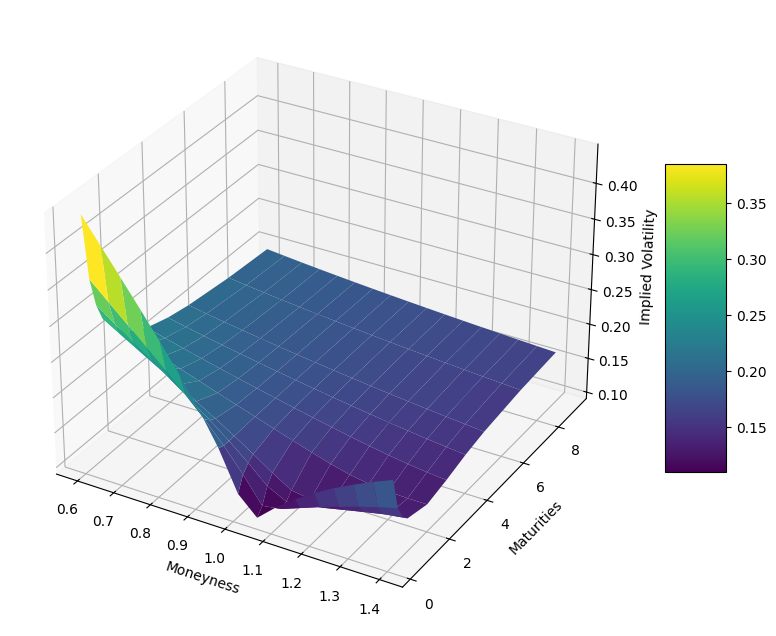

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, brentq
from scipy.integrate import quad
from scipy.stats import norm
from scipy.special import kv, gamma
from math import exp, sqrt, pi, log, isfinite

# Load the data
file_path = r'C:\Users\spyro\OneDrive - University of Edinburgh\Dissertation\Week 6 - Calibration\target_all.xlsx'
df_raw = pd.read_excel(file_path, engine='openpyxl')

# Drop rows with NaN values
df = df_raw.dropna()

# Extract maturities and moneyness
maturities = np.array(df.iloc[:, 0])
moneyness = np.array(df.columns[1:], dtype=float)

# Extract IV_target
IV_target = np.array(df.iloc[:, 1:], dtype=float)

# Define the degenerate hypergeometric function
def degenerate_hypergeometric_function(y1, y2, y3, p1, p2):
    def integrand(x):
        try:
            return (x ** (y1 - 1) * (1 - x) ** (y3 - y1 - 1) *
                    (1 - p1 * x) ** (-y2) * exp(p2 * x))
        except OverflowError:
            return np.inf
    result, error = quad(integrand, 0, 1)
    return (gamma(y3) / (gamma(y1) * gamma(y3 - y1))) * result

# Define Psi function
def Psi(x1, x2, x3):
    try:
        c = abs(x1) * sqrt(2 + x2**2)
        u = x2 / sqrt(2 + x2**2)
        sign_x1 = np.sign(x1)

        term1 = degenerate_hypergeometric_function(x3, 1-x3, 1+x3, (1+u)/2, -sign_x1*c*(1+u))
        term2 = degenerate_hypergeometric_function(1+x3, 1-x3, 2+x3, (1+u)/2, -sign_x1*c*(1+u))

        K_half_plus = kv(x3 + 0.5, c)
        K_half_minus = kv(x3 - 0.5, c)

        psi_value = (c**(x3+0.5) * exp(sign_x1*c) * (1+u)**x3 / (sqrt(2*pi) * gamma(x3) * x3) *
                     K_half_plus * term1 - sign_x1 * c**(x3+0.5) * exp(sign_x1*c) * (1+u)**(1+x3) /
                     (sqrt(2*pi) * gamma(x3) * (1+x3)) * K_half_minus * term2 +
                     sign_x1 * c**(x3+0.5) * exp(sign_x1*c) * (1+u)**x3 /
                     (sqrt(2*pi) * gamma(x3) * x3) * K_half_minus * term1)
    except (OverflowError, ValueError): 
        psi_value = np.inf
    return psi_value

# Define the European call option price function
def european_call_option_price(S0, K, T, r, theta, sigma, nu):
    try:
        a = theta / sqrt(sigma**2 + nu * theta**2 / 2)
        s = sigma**2 / sqrt(sigma**2 + nu * theta**2 / 2)
        c1 = nu * (a + s)**2 / 2
        c2 = nu * a**2 / 2
        
        d = (log(S0/K) + r*T + (T/nu) * log((1-c1)/(1-c2))) / s
        
        call_price = (S0 * Psi(d * sqrt((1-c1)/nu), (a + s) * sqrt(nu/(1 - c1)), T/nu) -
                      K * exp(-r*T) * Psi(d * sqrt((1-c2)/nu), a * sqrt(nu/(1 - c2)), T/nu))
    except (OverflowError, ValueError):
        call_price = np.inf
    return call_price

# Fix S0
S0 = 5639.17

# Define RMSE function to minimize
def rmse(params):
    r, theta, sigma, nu = params
    if theta < 1/nu - sigma**2 / 2:
        error = 0
        count = 0
        for i, T in enumerate(maturities):
            for j, M in enumerate(moneyness):
                K = S0 / M
                market_price = european_call_option_price(S0, K, T, r, theta, sigma, nu)
                model_iv = implied_volatility(S0, K, T, r, market_price)
                target_iv = IV_target[i, j]
                if not np.isnan(model_iv) and not np.isnan(target_iv):
                    error += (model_iv - target_iv) ** 2
                    count += 1
        if count == 0:
            return 10000
        else:
            return np.sqrt(error / count)
    else:
        return 10000

# Define implied volatility calculation using Black-Scholes model
def implied_volatility(S0, K, T, r, observed_price):
    def iv_objective(sigma):
        return black_scholes_call(S0, K, T, r, sigma) - observed_price
    try:
        return brentq(iv_objective, 0.01, 2.0)  # Search between 1% and 200% volatility
    except ValueError:
        return np.nan  # Return NaN if no solution is found

# Define Black-Scholes call option price function
def black_scholes_call(S0, K, T, r, sigma):
    if T <= 0:
        return max(S0 - K, 0)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Define parameter bounds
bounds = [(0, 0.21), (-2, 2), (0.01, 0.4), (0.06, 4)]

# Callback function to show progress
def progress_callback(xk, convergence):
    global iteration
    iteration += 1
    print(f"Iteration {iteration}: Current parameters: {xk}, Convergence: {convergence}")

# Initialize iteration counter
iteration = 0

# Perform the optimization using Differential Evolution
result = differential_evolution(rmse, bounds, callback=progress_callback) #strategy='best1bin', maxiter=4000, popsize=50, tol=1e-4,

# Extract the optimized parameters
r_opt, theta_opt, sigma_opt, nu_opt = result.x

print(f"Optimized Parameters:\nr: {r_opt}\ntheta: {theta_opt}\nsigma: {sigma_opt}\nnu: {nu_opt}")

# Calculate the implied volatility surface using the optimized parameters
implied_vols_opt = np.zeros((len(maturities), len(moneyness)))

for i, T in enumerate(maturities):
    for j, M in enumerate(moneyness):
        K = S0 / M
        market_price = european_call_option_price(S0, K, T, r_opt, theta_opt, sigma_opt, nu_opt)
        implied_vols_opt[i, j] = implied_volatility(S0, K, T, r_opt, market_price)

# Plotting the implied volatility surface with optimized parameters
X, Y = np.meshgrid(moneyness, maturities)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, implied_vols_opt, cmap='viridis')

# Add labels
ax.set_ylabel('Maturities')
ax.set_xlabel('Moneyness')
ax.set_zlabel('Implied Volatility')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


In [2]:
params = r_opt, theta_opt, sigma_opt, nu_opt
print(np.round(rmse(params),10))

0.0112853533


In [3]:
print(np.round([r_opt, theta_opt, sigma_opt, nu_opt], 6))

[0.       0.080061 0.134367 1.48222 ]


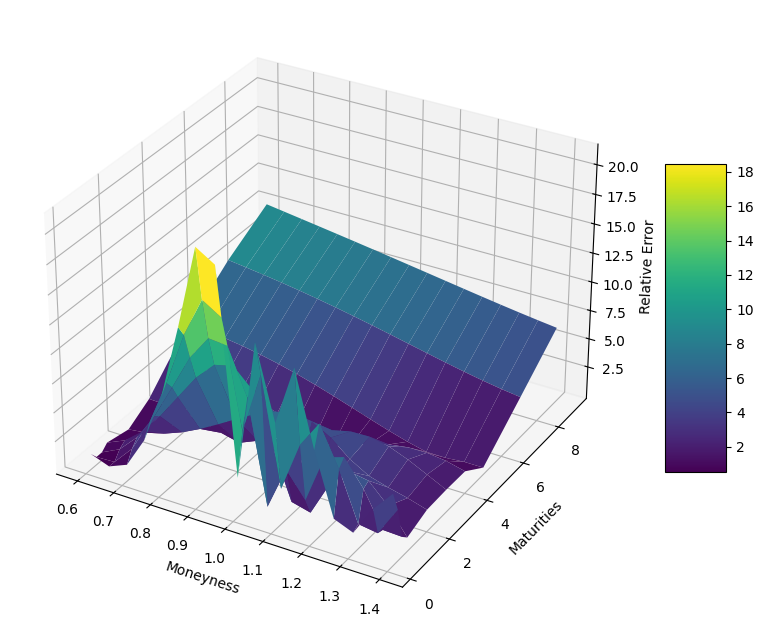

In [4]:
# Calculate the relative error
relative_error = np.abs((implied_vols_opt - IV_target) / IV_target) * 100

# Plotting the relative error surface with swapped axes
X, Y = np.meshgrid(moneyness, maturities)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, relative_error, cmap='viridis')

# Add labels
ax.set_ylabel('Maturities')
ax.set_xlabel('Moneyness')
ax.set_zlabel('Relative Error')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [14]:
implied_vols_opt[0]

array([0.43995427, 0.40364848, 0.36754588, 0.33122715, 0.29419993,
       0.2558141 , 0.21508478, 0.17022378, 0.11684195, 0.0789797 ,
       0.11373815, 0.14115196, 0.16406461, 0.18391196, 0.20149543,
       0.21731774, 0.23172012])

In [15]:
IV_target[0]

array([0.45134888, 0.41330192, 0.37238917, 0.32860256, 0.28193416,
       0.23304337, 0.18591488, 0.14940593, 0.12724707, 0.11499325,
       0.11169559, 0.12446858, 0.14803788, 0.17073386, 0.19092212,
       0.20890454, 0.22498986])

In [19]:
np.abs(implied_vols_opt[0]-IV_target[0])/IV_target[0]*100

array([ 2.52456888,  2.33568624,  1.30059715,  0.79871024,  4.35057968,
        9.77102293, 15.68991967, 13.93375109,  8.1770934 , 31.31796508,
        1.82869066, 13.40369099, 10.82610316,  7.71850118,  5.53802478,
        4.02729488,  2.99136157])

In [20]:
moneyness

array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 ])